#                                Aerial Cactus Identification - from kaggle
## Determine whether an image contains a columnar cactus

We will be using data from Kaggle competition of binary classification of Cactus images
* https://www.kaggle.com/c/aerial-cactus-identification/kernels

## Starting with Images Structure and Processing


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from warnings import filterwarnings
from PIL import Image
import cv2 as cv
%matplotlib inline

filterwarnings('ignore')

In [0]:
DATA_IN_GOOGLE_CLOUD = False
DATA_ON_LOCAL_MACHINE = True
DATA_IN_KAGGLE = False
I_AM_IN_KAGGLE_KERNEL = False

PATH =''

import sys
I_AM_IN_COLAB = 'google.colab' in sys.modules

if (I_AM_IN_COLAB):
    from google.colab import files
    from google.colab import drive

## Image data handeling & structure
* Read : image = plt.imread('filename.jpg')
* Show: plt.imshow(image)
### Color JPG
* numpy array of shape (im_height, im_width, channles)
* Data type is int 0-255
* or Float of 0-1
* 3 channles of R, G, B
* Red channle: image[:,:,0]
* Green channle: image[:,:,1]
* Blue channle:image[:,:,2]

Lets View & play with some of the data


In [0]:
if DATA_ON_LOCAL_MACHINE:
  uploaded = files.upload()

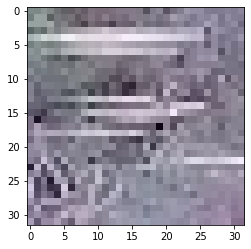

In [39]:
image = cv2.imread('0004be2cfeaba1c0361d39e2b000257b.jpg')
image.shape
plt.imshow(image)

### Extracting the BGR (Blue-Green-Red) channels.


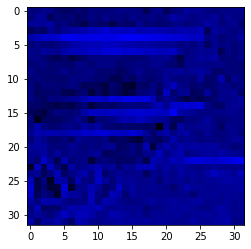

In [32]:
image[:,:,0] #, image[:,:,1] #, image[:,:,2]

blue_channel = image[:,:,2]

# Creating empty image with same shape as that as 'image'
blue_image = np.zeros(shape=image.shape, dtype=np.uint8)

# assigning blue channel of 'image' to empty blue_image.
blue_image[:,:,2] = blue_channel
plt.imshow(blue_image)

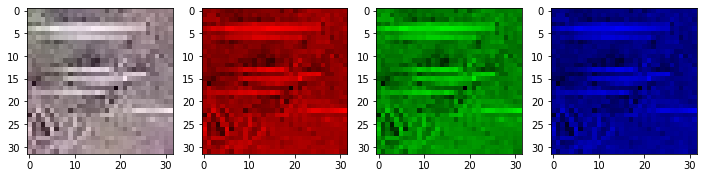

In [33]:
plt.figure(figsize=(12,5))
plt.subplot(1, 4, 1)
plt.imshow(image)
channel = 0
for x in range(2,5):
    bgr_image = np.zeros(shape=image.shape, dtype=np.uint8)
    bgr_image[:,:,channel] = image[:,:,channel]
    channel += 1
    plt.subplot(1,4,x)
    plt.imshow(bgr_image)

## Access pixels in the image
we can access any pixel with indexing and slicing
* image rows 10-20: image[10:20,:,:]
* image columns: image[:,20:30,:]

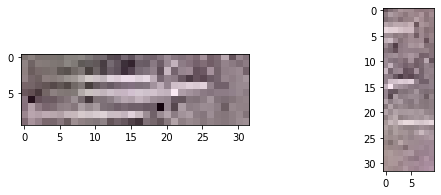

In [34]:
plt.figure(figsize=(9,3))
plt.subplot(1, 2, 1)
plt.imshow(image[10:20,:,:])
plt.subplot(1, 2, 2)
plt.imshow(image[:,20:30,:])

##  Image Processing
* decoloring with MiniBatch for better use of our computing resources
* resize : cv.resize(image, dsize=(new_x,new_y))
* Edges

In [0]:
# Color Quantization with OpenCV using MiniBatchKMeans

import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.
from sklearn.cluster import MiniBatchKMeans

# load the image and grab its width and height
image = plt.imread('0e514dd2cac099c6a6cbe2b7e67ad610.jpg')
(h, w) = image.shape[:2]
# convert the image from the RGB color space to the L*a*b*
# color space -- since we will be clustering using k-means
# which is based on the euclidean distance, we'll use the
# L*a*b* color space where the euclidean distance implies
# perceptual meaning
image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
# reshape the image into a feature vector so that k-means
# can be applied
image = image.reshape((image.shape[0] * image.shape[1], 3))
# apply k-means using the specified number of clusters and
# then create the quantized image based on the predictions
kmeans = MiniBatchKMeans(6)
labels = kmeans.fit_predict(image)
new_colors = kmeans.cluster_centers_.astype("uint8")[labels]



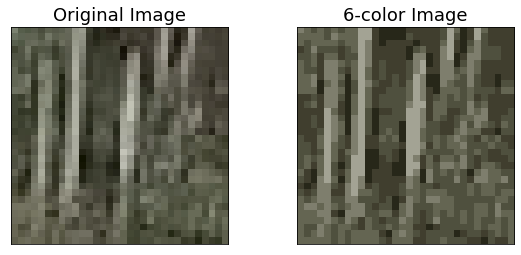

In [66]:
# reshape the feature vectors to images
image_recolored = new_colors.reshape((h, w, 3))
image = image.reshape((h, w, 3))
# convert from L*a*b* to RGB
image_recolored = cv2.cvtColor(image_recolored, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

# display the images
fig, ax = plt.subplots(1, 2, figsize=(10, 4),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(image)
ax[0].set_title('Original Image', size=18)
ax[1].imshow(image_recolored)
ax[1].set_title('6-color Image', size=18);

Text(0.5, 1.0, 'edges in 128px')

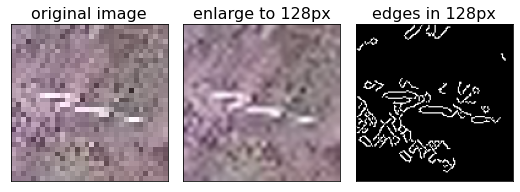

In [67]:
# resizing image size from 32 to 128px and extracting edges

image = plt.imread('000d1e9a533f62e55c289303b072733d.jpg')
res = cv.resize(image, dsize=(128,128), interpolation=cv.INTER_CUBIC)
edges = cv.Canny(res, 100, 200)

fig, ax = plt.subplots(1, 3, figsize=(9, 3),
                        subplot_kw=dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace=0.1)
ax[0].imshow(image)
ax[0].set_title('original image', size=16)
ax[1].imshow(res)
ax[1].set_title('enlarge to 128px', size=16)
ax[2].imshow(edges, cmap = 'gray')
ax[2].set_title('edges in 128px', size=16)


--------------------------------------------------------------------------------

# **LET'S GET STARTED **

## **1. Loading the data from Kaggel to Colab **

In [5]:
import os
DATA_IN_KAGGLE=True
I_AM_IN_COLAB=True
if DATA_IN_KAGGLE and I_AM_IN_COLAB:
    os.environ['KAGGLE_USERNAME']= 'tfraizler'
    os.environ['KAGGLE_KEY']= '5097c8c72ba430b2bddea94e81a74a80'
    !kaggle competitions download -c aerial-cactus-identification
    df = pd.read_csv('train.csv')

    sample_submission = pd.read_csv('sample_submission.csv')

  0% 0.00/160k [00:00<?, ?B/s]
100% 160k/160k [00:00<00:00, 59.0MB/s]
  0% 0.00/667k [00:00<?, ?B/s]
100% 667k/667k [00:00<00:00, 43.6MB/s]
 26% 5.00M/19.2M [00:00<00:01, 12.9MB/s]
100% 19.2M/19.2M [00:00<00:00, 39.1MB/s]
100% 4.20M/4.20M [00:00<00:00, 16.4MB/s]



In [7]:
!ls -lt

total 24820
-rw-r--r-- 1 root root  4408369 May  4 17:24 test.zip
-rw-r--r-- 1 root root 20148140 May  4 17:24 train.zip
-rw-r--r-- 1 root root   682514 May  4 17:23 train.csv
-rw-r--r-- 1 root root   164014 May  4 17:23 sample_submission.csv
drwxr-xr-x 1 root root     4096 Apr  3 16:24 sample_data


In [8]:
df.sample(5)

,id,has_cactus
13316,c1660e00ed55fcf1a5906c6e0db2d527.jpg,0
5022,4806281bb2e80d3d3279db290fdbeaf6.jpg,1
3354,2f12c122948cf1fe9a3ff3b118533dff.jpg,1
13571,c51d6fdc5f32959aa2cfd0bf04624ad5.jpg,1
12074,aee9d3dd2ad14238174c798ed477a332.jpg,1


In [0]:
!unzip train.zip

In [10]:
df.shape

(17500, 2)

In [11]:
df_sample = df.sample(6000, random_state=333)
df_sample['has_cactus'].value_counts()

1    4441
0    1559
Name: has_cactus, dtype: int64

## **we are in a 73% balanced ratio**

In [12]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_sample, test_size=0.3, random_state=0)
df_train.shape, df_test.shape

((4200, 2), (1800, 2))

In [13]:
df_train['has_cactus'].value_counts()

1    3085
0    1115
Name: has_cactus, dtype: int64

### this func will help us build a file name using the 'id' of an image, later to "imread it" !

In [0]:
def read_image(row):
  
  fname = 'train/' + str(row['id'])
  image = plt.imread(fname)
  
  return image

### next we will build an array of the images with the same loc as thier labels in the train.csv

In [0]:
images = []

for i in range(len(df_train)):
  
   images.append(read_image(df_train.iloc[i]).flatten())
    
images = np.array(images)
    
labels = df_train['has_cactus'].values

In [17]:
images.shape, labels.shape

((4200, 3072), (4200,))

In [0]:
test_images = []

for i in range(len(df_test)):
  
  test_images.append(read_image(df_test.iloc[i]).flatten())

test_images = np.array(test_images)
test_labels = df_test['has_cactus'].values

In [19]:
test_images.shape, test_labels.shape

((1800, 3072), (1800,))

## **Importing models & tools**

In [0]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier, \
    AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import validation_curve



### report func for the train & test

In [0]:
def report(y, y_pred, classes):
  acc = accuracy_score(y, y_pred)
  
  cm = pd.DataFrame(confusion_matrix(y, y_pred), 
                   index = classes, 
                   columns = classes)
  rep = classification_report(y, y_pred)
  
  return 'accuracy_score: {:.3f}\n\n{}\n\n{}'.format(acc, cm, rep)

In [0]:
def test_report(test_labels, pred_test, classes):
  acc = accuracy_score(test_labels, pred_test)
  
  cm = pd.DataFrame(confusion_matrix(test_labels, pred_test), 
                   index = classes, 
                   columns = classes)
  rep = classification_report(test_labels, pred_test)
  
  return 'accuracy_score: {:.3f}\n\n{}\n\n{}'.format(acc, cm, rep)

--------------------------------------------------------------------------------

# **MODEL 1 : DecisionTreeClassifier - As a base model !!!**

In [0]:
X = images
y = labels

In [0]:
param = 'max_depth'
param_range = range(1,10)
train_scores, test,scores = validation_curve(DecisionTreeClassifier(), X, y, 'max_depth',
                                             param_range=param_range,
                                             cv=10)

### ploting a validation curve in order to find the proper 'max depth'

In [0]:
param='max_depth'
param_range = range(1,30)
train_scores, test_scores = validation_curve(DecisionTreeClassifier(), X, y, 
                                            param_name=param,
                                            param_range=param_range, 
                                             cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("cactus - validation Curve with DecisionTreeRegressor")
plt.xlabel(param)
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

### looking at the Validation curve we can see that max_depth=5 will suit us best !

In [24]:
clf = DecisionTreeClassifier(max_depth=5, 
                             min_samples_split=2, 
                             min_samples_leaf=1).fit(X, y) # class_weight={0: 2, 1: 1},
y_pred = clf.predict(X)

print(report(y, y_pred, ['no_cacatus', 'has_cactus']))

accuracy_score: 0.855

            no_cacatus  has_cactus
no_cacatus         669         446
has_cactus         165        2920

              precision    recall  f1-score   support

           0       0.80      0.60      0.69      1115
           1       0.87      0.95      0.91      3085

    accuracy                           0.85      4200
   macro avg       0.83      0.77      0.80      4200
weighted avg       0.85      0.85      0.85      4200



In [25]:
pred_test = clf.predict(test_images)

print(test_report(test_labels, pred_test, ['no_cacatus', 'has_cactus']))

accuracy_score: 0.827

            no_cacatus  has_cactus
no_cacatus         238         206
has_cactus         106        1250

              precision    recall  f1-score   support

           0       0.69      0.54      0.60       444
           1       0.86      0.92      0.89      1356

    accuracy                           0.83      1800
   macro avg       0.78      0.73      0.75      1800
weighted avg       0.82      0.83      0.82      1800



--------------------------------------------------------------------------------

# **MODEL 2 : RandomForestClassifier** + 2 experiments 

## 1. with " *enlargement* " - resizing to 128 x 128

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score,\
    GridSearchCV

In [0]:
def read_image(row):
  
  fname = 'train/' + str(row['id'])
  image = cv2.imread(fname)
  image = cv.resize(image,dsize=(128,128),interpolation=cv.INTER_CUBIC)
  
  return image
# -------------------------------------

images = []

for i in range(len(df_train)):
  
   images.append(read_image(df_train.iloc[i]).flatten())
    
images = np.array(images)
    
labels = df_train['has_cactus'].values
# -------------------------------------

test_images = []

for i in range(len(df_test)):
  
  test_images.append(read_image(df_test.iloc[i]).flatten())

test_images = np.array(test_images)
test_labels = df_test['has_cactus'].values
# -------------------------------------

X1 = images

y = labels

test_images = test_images

In [0]:
clf = RandomForestClassifier(max_depth=5)

clf.fit(X1,y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred = clf.predict(X1)

print('accuracy :', accuracy_score(y, y_pred), '\n')
print(classification_report(y, y_pred))

accuracy : 0.8859523809523809 

              precision    recall  f1-score   support

           0       0.94      0.61      0.74      1115
           1       0.87      0.99      0.93      3085

    accuracy                           0.89      4200
   macro avg       0.91      0.80      0.83      4200
weighted avg       0.89      0.89      0.88      4200



In [0]:
pred_test = clf.predict(test_images)

print('accuracy :', accuracy_score(test_labels, pred_test), '\n')

print(classification_report(test_labels, pred_test))

accuracy : 0.8694444444444445 

              precision    recall  f1-score   support

           0       0.89      0.53      0.67       444
           1       0.87      0.98      0.92      1356

    accuracy                           0.87      1800
   macro avg       0.88      0.76      0.79      1800
weighted avg       0.87      0.87      0.86      1800



##For indication of the classifier quality it is sometimmes useful to look at the area under the ROC curve

In [0]:
test_roc_labels = pd.DataFrame(data=test_labels)

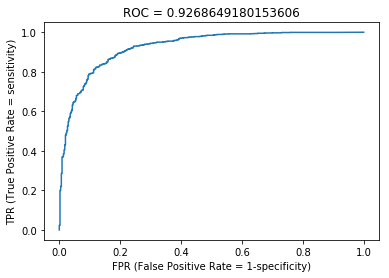

In [0]:
 scores = clf.predict_proba(test_images)
fpr, tpr, thresholds = roc_curve(test_roc_labels.values, scores[:,1])
plt.plot(fpr, tpr)
plt.title('ROC')
plt.xlabel('FPR (False Positive Rate = 1-specificity)')
plt.ylabel('TPR (True Positive Rate = sensitivity)')
plt.title('ROC = '+str(roc_auc_score(test_roc_labels.values, scores[:,1])));

--------------------------------------------------------------------------------

# 2. RandomForestClassifier + *GridSearchCV*

In [0]:
def read_image(row):
  
  fname = 'train/' + str(row['id'])
  image = plt.imread(fname)
  
  return image

In [0]:
test_images = []

for i in range(len(df_test)):
  
  test_images.append(read_image(df_test.iloc[i]).flatten())

test_images = np.array(test_images)

In [0]:
param_grid = {'max_depth': [20],
    'max_features': [5],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [4, 6, 8]}

In [0]:
clf = RandomForestClassifier(bootstrap=False, n_estimators=50)

grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [0]:
grid_search.fit(X,y)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   55.3s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=False,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                     

In [0]:
print ("Best model:", grid_search.best_estimator_)
print ("Best parameters:", grid_search.best_params_)
print ("Best score:", grid_search.best_score_)

Best model: RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=20, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Best parameters: {'max_depth': 20, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 6}
Best score: 0.87


In [0]:
pred_test = grid_search.predict(test_images)

print('accuracy :', accuracy_score(test_labels, pred_test))

accuracy : 0.8855555555555555


--------------------------------------------------------------------------------

# MODEL 3. XGBoost 

In [0]:
from xgboost import XGBClassifier

In [0]:
clf = XGBClassifier()

In [0]:
clf.fit(X, y)

y_pred = clf.predict(X)

print('accuracy :', accuracy_score(y, y_pred))

accuracy : 0.9797619047619047


In [0]:
pred_test = clf.predict(test_images)

print('accuracy :', accuracy_score(test_labels, pred_test), '\n')

print(classification_report(test_labels, pred_test))

accuracy : 0.9322222222222222 

              precision    recall  f1-score   support

           0       0.93      0.79      0.85       444
           1       0.93      0.98      0.96      1356

    accuracy                           0.93      1800
   macro avg       0.93      0.88      0.90      1800
weighted avg       0.93      0.93      0.93      1800





---


# ***DEEP LEARNING***

---





In [0]:
import keras
# Sequential is the basic feed forward neural network (FFN)
from keras.models import Sequential
# Dense is fully connected layer
# Dropout is a "noising" layer, to prevent over feet.
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop

In [0]:
images = []

for i in range(len(df_train)):
  images.append(read_image(df_train.iloc[i]))

images = np.array(images)

labels = df_train['has_cactus'].values

In [27]:
images.shape, labels.shape

((4200, 32, 32, 3), (4200,))

In [0]:
test_images = []

for i in range(len(df_test)):
  test_images.append(read_image(df_test.iloc[i]))

test_images = np.array(test_images)
test_labels = df_test['has_cactus'].values

In [29]:
test_images.shape, test_labels.shape

((1800, 32, 32, 3), (1800,))

In [0]:
X = images
y = labels

In [0]:
from keras.utils import to_categorical

y = to_categorical(y)
test_labels = to_categorical(test_labels)

In [0]:
def drow_history(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+ metric])
    plt.title('model '+metric)
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()    

In [0]:
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [0]:
def get_model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(32,32,3)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(2, activation='softmax'))
  return model


In [42]:
model = get_model()
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)              

In [45]:
batch_size = 20

history = model.fit(X, y,
                    batch_size=batch_size,
                    epochs=20,
                    verbose=1,
                    validation_data=(test_images, test_labels))

Train on 4200 samples, validate on 1800 samples
Epoch 1/20
4200/4200 [==============================] - 7s 2ms/step - loss: 0.2116 - accuracy: 0.9286 - val_loss: 0.1717 - val_accuracy: 0.9461
Epoch 2/20
4200/4200 [==============================] - 7s 2ms/step - loss: 0.2254 - accuracy: 0.9352 - val_loss: 0.1982 - val_accuracy: 0.9617
Epoch 3/20
4200/4200 [==============================] - 7s 2ms/step - loss: 0.2992 - accuracy: 0.9426 - val_loss: 0.2302 - val_accuracy: 0.9683
Epoch 4/20
4200/4200 [==============================] - 7s 2ms/step - loss: 0.2377 - accuracy: 0.9467 - val_loss: 0.1735 - val_accuracy: 0.9606
Epoch 5/20
4200/4200 [==============================] - 7s 2ms/step - loss: 0.1993 - accuracy: 0.9364 - val_loss: 0.1404 - val_accuracy: 0.9567
Epoch 6/20
4200/4200 [==============================] - 7s 2ms/step - loss: 0.4554 - accuracy: 0.9448 - val_loss: 7.5568 - val_accuracy: 0.7594
Epoch 7/20
4200/4200 [==============================] - 7s 2ms/step - loss: 0.2024 - acc

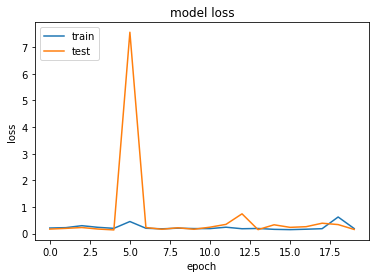

In [46]:
drow_history(history, 'loss')

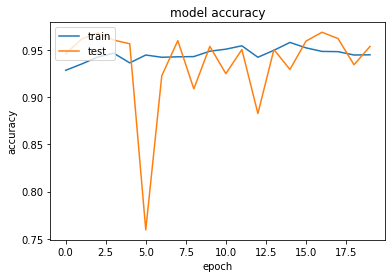

In [49]:
drow_history(history, 'accuracy')

In [48]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.15801821475227673
Test accuracy: 0.9538888931274414
